<a href="https://colab.research.google.com/github/bhanuprasadtudy/advancedadvertisingstatistics/blob/master/Merging_ad_spend_data_%26_Google_Trends_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and Resample data

In [0]:
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
mercedesbenzdata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mercedesbenz.googletrends.csv', parse_dates=['period'],index_col ="period" )


In [0]:
mercedesbenzdata.head()

,Unnamed: 0,date,value,onediffvalue
period,,,,
2013-10-07,0,Oct 07 2013,3997.423359,NaN
2013-10-08,1,Oct 08 2013,4175.337771,177.914412
2013-10-09,2,Oct 09 2013,4024.925648,-150.412123
2013-10-10,3,Oct 10 2013,3887.818761,-137.106887
2013-10-11,4,Oct 11 2013,4111.597680,223.778919


In [0]:
weekly_summary = mercedesbenzdata.resample('W').mean()
weekly_summary.head()

,Unnamed: 0,value,onediffvalue
period,,,
2013-10-13,3,4122.608701,27.059775
2013-10-20,10,4073.020551,-8.473709
2013-10-27,17,4106.416964,14.768580
2013-11-03,24,3942.066792,-15.370406
2013-11-10,31,3643.773861,-46.529863


In [0]:
benz = pd.read_csv("/content/drive/My Drive/Colab Notebooks/mercedesbenz.adspend.csv")
benz['TIME PERIOD'] = benz['TIME PERIOD'].str.replace('WEEK OF ','')
benz['TIME PERIOD'] = benz['TIME PERIOD'].str.replace(r"\(.*?\)", "")
import datetime
benz['TIME PERIOD'] = pd.to_datetime(benz['TIME PERIOD'], format='%b %d, %Y ')
benz['TOTAL DOLS (000)'] = benz['TOTAL DOLS (000)'] * 1000
benz['NETWORK TV DOLS (000)'] = benz['NETWORK TV DOLS (000)'] * 1000
benz['CABLE TV DOLS (000)'] = benz['CABLE TV DOLS (000)'] * 1000
benz['SYNDICATION DOLS (000)'] = benz['SYNDICATION DOLS (000)'] * 1000
benz['SPOT TV DOLS (000)'] = benz['SPOT TV DOLS (000)'] * 1000
benz['MAGAZINES DOLS (000)'] = benz['MAGAZINES DOLS (000)'] * 1000
benz['SUNDAY MAGS DOLS (000)'] = benz['SPOT TV DOLS (000)'] * 1000
benz['NATL NEWSP DOLS (000)'] = benz['NATL NEWSP DOLS (000)'] * 1000
benz['NEWSPAPER DOLS (000)'] = benz['NEWSPAPER DOLS (000)'] * 1000
benz['NETWORK RADIO DOLS (000)'] = benz['NETWORK RADIO DOLS (000)'] * 1000
benz['NAT SPOT RADIO DOLS (000)'] = benz['NAT SPOT RADIO DOLS (000)'] * 1000
benz['OUTDOOR DOLS (000)'] = benz['OUTDOOR DOLS (000)'] * 1000
benz= benz.set_index('TIME PERIOD')
benz.columns=benz.columns.str.replace(r"\(.*?\)","")
benz.columns=benz.columns.str.replace(" DOLS","")
benz.head()

,PRODUCT,TOTAL,NETWORK TV,CABLE TV,SYNDICATION,SPOT TV,MAGAZINES,SUNDAY MAGS,NATL NEWSP,NEWSPAPER,NETWORK RADIO,NAT SPOT RADIO,OUTDOOR
TIME PERIOD,,,,,,,,,,,,,
2013-10-07,Mercedes Benz CLA : European Passenger Auto,4464100.0,887600.0,1161200.0,0.0,2129000.0,286400.0,2.129000e+09,0.0,0.0,0.0,0.0,0.0
2013-10-07,Mercedes Benz CLA250 : European Passenger Auto,1196500.0,426200.0,770300.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2013-10-07,Mercedes Benz CLA250 Leasing : European Passen...,100.0,0.0,0.0,0.0,100.0,0.0,1.000000e+05,0.0,0.0,0.0,0.0,0.0
2013-10-07,Mercedes Benz Full Line : Various European Aut...,30200.0,0.0,0.0,0.0,1100.0,0.0,1.100000e+06,0.0,0.0,28800.0,200.0,0.0
2013-10-07,Mercedes Benz Full Line Pre-Owned : Various Eu...,37100.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,37100.0,0.0,0.0


In [0]:
weekly_ad = benz.resample('W').mean()
weekly_ad.head()

,TOTAL,NETWORK TV,CABLE TV,SYNDICATION,SPOT TV,MAGAZINES,SUNDAY MAGS,NATL NEWSP,NEWSPAPER,NETWORK RADIO,NAT SPOT RADIO,OUTDOOR
TIME PERIOD,,,,,,,,,,,,
2013-10-13,1.085167e+06,218966.666667,323783.333333,0.000000,355033.333333,176366.666667,3.550333e+08,0.000000,0.000000,10983.333333,33.333333,0.000000
2013-10-20,1.115586e+06,550757.142857,307357.142857,0.000000,172985.714286,7114.285714,1.729857e+08,67928.571429,0.000000,9414.285714,28.571429,0.000000
2013-10-27,6.276000e+05,238366.666667,173041.666667,0.000000,151891.666667,58775.000000,1.518917e+08,0.000000,0.000000,5491.666667,16.666667,0.000000
2013-11-03,5.861714e+05,232933.333333,99519.047619,95.238095,79500.000000,161919.047619,7.950000e+07,0.000000,319.047619,3219.047619,19.047619,8647.619048
2013-11-10,4.486545e+05,364963.636364,44009.090909,0.000000,909.090909,32363.636364,9.090909e+05,0.000000,0.000000,6354.545455,54.545455,0.000000


# Joining Datasets

In [0]:
combined = pd.merge(weekly_ad, weekly_summary, left_index=True, right_index=True)
combined.head()

,TOTAL,NETWORK TV,CABLE TV,SYNDICATION,SPOT TV,MAGAZINES,SUNDAY MAGS,NATL NEWSP,NEWSPAPER,NETWORK RADIO,NAT SPOT RADIO,OUTDOOR,Unnamed: 0,value,onediffvalue
TIME PERIOD,,,,,,,,,,,,,,,
2013-10-13,1.085167e+06,218966.666667,323783.333333,0.000000,355033.333333,176366.666667,3.550333e+08,0.000000,0.000000,10983.333333,33.333333,0.000000,3,4122.608701,27.059775
2013-10-20,1.115586e+06,550757.142857,307357.142857,0.000000,172985.714286,7114.285714,1.729857e+08,67928.571429,0.000000,9414.285714,28.571429,0.000000,10,4073.020551,-8.473709
2013-10-27,6.276000e+05,238366.666667,173041.666667,0.000000,151891.666667,58775.000000,1.518917e+08,0.000000,0.000000,5491.666667,16.666667,0.000000,17,4106.416964,14.768580
2013-11-03,5.861714e+05,232933.333333,99519.047619,95.238095,79500.000000,161919.047619,7.950000e+07,0.000000,319.047619,3219.047619,19.047619,8647.619048,24,3942.066792,-15.370406
2013-11-10,4.486545e+05,364963.636364,44009.090909,0.000000,909.090909,32363.636364,9.090909e+05,0.000000,0.000000,6354.545455,54.545455,0.000000,31,3643.773861,-46.529863


# Correlation


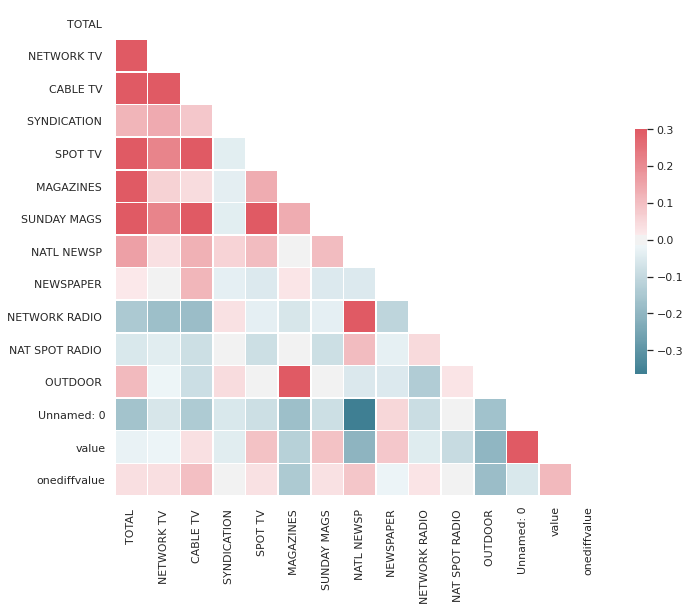

In [0]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style="white")
corr = combined.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Not looking at the Total column, based on the heatmap we see the strongest correlation between the following variables:
  1. **Network TV  - Cable TV**
  2. Cable TV - Spot TV, Sunday Magazines
  3. Spot TV - Sunday magazines
  4. **Magazines - Outdoors**
  5. National Newspaper - Radio Network

But if we look at the correlation matrix itself, the strongest relationship is between magazines and outdoors(0.68) followed by Network Tv and Cable TV(0.47)

# Granger Causality

In [0]:
from statsmodels.tsa.stattools import grangercausalitytests

In [0]:
grangerOutdoor = grangercausalitytests(combined[['value', 'OUTDOOR ']], 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1883  , p=0.0417  , df_denom=257, df_num=1
ssr based chi2 test:   chi2=4.2371  , p=0.0395  , df=1
likelihood ratio test: chi2=4.2030  , p=0.0404  , df=1
parameter F test:         F=4.1883  , p=0.0417  , df_denom=257, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.4839  , p=0.0122  , df_denom=254, df_num=2
ssr based chi2 test:   chi2=9.1443  , p=0.0103  , df=2
likelihood ratio test: chi2=8.9866  , p=0.0112  , df=2
parameter F test:         F=4.4839  , p=0.0122  , df_denom=254, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.8106  , p=0.0107  , df_denom=251, df_num=3
ssr based chi2 test:   chi2=11.7507 , p=0.0083  , df=3
likelihood ratio test: chi2=11.4910 , p=0.0093  , df=3
parameter F test:         F=3.8106  , p=0.0107  , df_denom=251, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.9526  , p=0.0207  

Looking at the result if F-test, we cannot reject the hypothesis that advertising spend predict Google Trends for outdoors as the p- value is less than 0.05 for all the weeks.

In [0]:
grangerMagazines = grangercausalitytests(combined[['value', 'MAGAZINES ']], 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4025  , p=0.0662  , df_denom=257, df_num=1
ssr based chi2 test:   chi2=3.4422  , p=0.0635  , df=1
likelihood ratio test: chi2=3.4197  , p=0.0644  , df=1
parameter F test:         F=3.4025  , p=0.0662  , df_denom=257, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4206  , p=0.0342  , df_denom=254, df_num=2
ssr based chi2 test:   chi2=6.9759  , p=0.0306  , df=2
likelihood ratio test: chi2=6.8836  , p=0.0320  , df=2
parameter F test:         F=3.4206  , p=0.0342  , df_denom=254, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2544  , p=0.0223  , df_denom=251, df_num=3
ssr based chi2 test:   chi2=10.0354 , p=0.0183  , df=3
likelihood ratio test: chi2=9.8451  , p=0.0199  , df=3
parameter F test:         F=3.2544  , p=0.0223  , df_denom=251, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.0455  , p=0.0034  

For magazines, we can reject the hypotheis that advertising spend predict Google Trends for one week as the p-value is greater than 0.05 for one week lag and for others we can't reject the null. 

# Granger Insights

Does it appear possible that outdoor advertising has a delayed effect on Google Trends?
Ans:There doesn't seem to be a major delayed effect as all the p values seem to be less that 0.05 and there is a trend.

Does it appear possible that magazine advertising has a delayed effect on Google Trends?
Ans:The is a delayed effect from week 1 to other weeeks as the trend of p values changes from over 0.05 to under 0.05.